<a href="https://colab.research.google.com/github/SidSolanki28/Absenteeism-at-Work/blob/master/simplified_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [217]:
# important packages
	
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis
import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

In [218]:
# To display all rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [219]:
### Importing content from drive ###

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [220]:
df = pd.read_csv("/content/drive/My Drive/Project/Absenteeism/Absenteeism_pre_processed.csv")

In [221]:
df.head()

,Reason A,Reason B,Reason C,Reason D,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,2


# Data Cleaning

In [222]:
df.columns

Index(['Reason A', 'Reason B', 'Reason C', 'Reason D', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [223]:
df = df.drop(['Work load Average/day ', 'Hit target', 'Social smoker'], axis = 1)

# Feature Engineering

### Check Target

In [224]:
df['Absenteeism time in hours'].median()

3.0

Let's divide Absenteeism into two classes

- Moderately Absent [0] <= 3
- Excessively Absent [1] > 3

Because absenteeism for 2-3 hours not going to affect productivity.




In [225]:
df['Absenteeism time in hours'] = df['Absenteeism time in hours'].apply( lambda x: 1 if x > 3 else 0)

In [226]:
df.head()

,Reason A,Reason B,Reason C,Reason D,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Disciplinary failure,Education,Son,Social drinker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,0,0,2,1,1,90,172,30,1
1,0,0,0,0,7,3,1,118,13,18,50,1,0,1,1,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,0,0,0,1,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,0,0,2,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,33,0,0,2,1,1,90,172,30,0


Check dataset is balanced or imbalanced

In [227]:
Moderately_Absent = df[df['Absenteeism time in hours'] == 0]
Excessively_Absent = df[df['Absenteeism time in hours'] == 1]

In [228]:
print(f'Total Employee count = {len(df)}')
print(f'Employees who Moderately Absent = {len(Moderately_Absent)/len(df)*100:.2f}%')
print(f'Employees who Excessively Absent = {len(Excessively_Absent)/len(df)*100:.2f}%')

Total Employee count = 700
Employees who Moderately Absent = 54.43%
Employees who Excessively Absent = 45.57%


Dataset is Balanced

### Define X&Y

In [229]:
X = df.iloc[:, :-1]#.values
y = df.iloc[:, -1]#.values

# Feature Scaling

### Omitting dummy variables

Dummy variables hold the originally measured effect sizes. Normalizing or standardizing them will let us compromise on their interpret ability. IMO, if your objective is to interpret the feature, then scaling should not be done. Otherwise, for model selection purposes, you can attempt to scale the dummy variables.

In [230]:
# standardize the inputs

# standardization is one of the most common preprocessing tools
# since data of different magnitude (scale) can be biased towards high values,
# we want all inputs to be of similar magnitude
# this is a peculiarity of machine learning in general - most (but not all) algorithms do badly with unscaled data

# a very useful module we can use is StandardScaler 
# it has much more capabilities than the straightforward 'preprocessing' method
from sklearn.preprocessing import StandardScaler


# we will create a variable that will contain the scaling information for this particular dataset
# here's the full documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# define scaler as an object
scaler_X = StandardScaler()

In [231]:
# import the libraries needed to create the Custom Scaler
# note that all of them are a part of the sklearn package
# moreover, one of them is actually the StandardScaler module, 
# so you can imagine that the Custom Scaler is build on it

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [232]:
# check what are all columns that we've got
X.columns.values

array(['Reason A', 'Reason B', 'Reason C', 'Reason D', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Pet', 'Weight', 'Height', 'Body mass index'], dtype=object)

In [233]:
# choose the columns to scale
# we later augmented this code and put it in comments
# columns_to_scale = ['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
       #'Work load Average/day ', 'Hit target', 'Son', 'Pet', 'Weight', 'Height', 'Body mass index']
    
# select the columns to omit
columns_to_omit = ['Reason A', 'Reason B', 'Reason C', 'Reason D', 'Disciplinary failure',
       'Education', 'Social drinker']

In [234]:
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in X.columns.values if x not in columns_to_omit]

In [235]:
# declare a scaler object, specifying the columns you want to scale
scaler_X = CustomScaler(columns_to_scale)

In [236]:
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
scaler_X.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Month of absence', 'Day of the week', 'Seasons',
                      'Transportation expense',
                      'Distance from Residence to Work', 'Service time', 'Age',
                      'Son', 'Pet', 'Weight', 'Height', 'Body mass index'],
             copy=None, with_mean=None, with_std=None)

### Standardization

In [237]:
# standardizes the data, using the transform method 
# in the last line, we fitted the data - in other words
# we found the internal parameters of a model that will be used to transform data. 
# transforming applies these parameters to our data
# note that when you get new data, you can just call 'scaler' again and transform it in the same way as now
X = scaler_X.transform(X)

In [238]:
# the scaled_inputs are now an ndarray, because sklearn works with ndarrays
X

,Reason A,Reason B,Reason C,Reason D,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Disciplinary failure,Education,Son,Social drinker,Pet,Weight,Height,Body mass index
0,0,0,0,1,0.182726,-0.640141,-1.417727,1.005844,0.412816,0.078981,-0.536062,0,0,0.880469,1,0.268487,0.847020,-0.006413,0.767431
1,0,0,0,0,0.182726,-0.640141,-1.417727,-1.574681,-1.141882,1.235604,2.130803,1,0,-0.019280,1,-0.589690,1.470975,0.991176,1.002633
2,0,0,0,1,0.182726,0.064417,-1.417727,-0.654143,1.426749,1.235604,0.248310,0,0,-0.919030,1,-0.589690,0.769025,-0.338943,1.002633
3,1,0,0,0,0.182726,0.768974,-1.417727,0.854936,-1.682647,0.310306,0.405184,0,0,0.880469,1,-0.589690,-0.868858,-0.671472,-0.643782
4,0,0,0,1,0.182726,0.768974,-1.417727,1.005844,0.412816,0.078981,-0.536062,0,0,0.880469,1,0.268487,0.847020,-0.006413,0.767431
5,0,0,0,1,0.182726,1.473532,-1.417727,-0.654143,1.426749,1.235604,0.248310,0,0,-0.919030,1,-0.589690,0.769025,-0.338943,1.002633
6,0,0,0,1,0.182726,1.473532,-1.417727,2.092381,1.494345,-2.234266,-1.320435,0,0,-0.019280,1,2.843016,0.067075,-0.006413,0.061825
7,0,0,0,1,0.182726,1.473532,-1.417727,0.568211,1.359154,-0.383668,-0.065439,0,0,2.679969,1,-0.589690,-1.102841,-0.671472,-0.878984
8,0,0,1,0,0.182726,-1.344699,-1.417727,-1.016322,-1.209478,0.310306,-0.379188,0,0,0.880469,1,-0.589690,1.236992,3.983943,-0.408580
9,0,0,0,1,0.182726,-1.344699,-1.417727,0.190942,-1.277074,0.310306,0.091435,0,1,-0.019280,0,0.268487,0.691031,-0.006413,0.532229


In [239]:
# check the shape of the inputs
X.shape

(700, 19)

# Feature Splitting

Note:- 

Usually it is good to splitting first then standardize, to get parameters [mean & std dev] by fitting data from X_train.

Why do we have to normalize data this way? Remember that we’ll use our data to train our model, so we’ll want our StandardScaler object to register and proceed with the Mean and Standard Deviation of our train set and transform our test group using it. Otherwise, we would be doing two different transformations, taking two different Means and two different Standard Deviations. Treating as different data that’s supposed to be the same.

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

In [241]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(560, 19) (560,)
(140, 19) (140,)


# Model Training

### Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Prediction

In [243]:
y_train_pred = classifier.predict(X_train)

# Training Metrices

### Accuracy

In [244]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_train_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.79%


Yay! Training Accuracy increases by 1%

### Confusion Matrix ###

[[240  59]
 [ 60 201]]


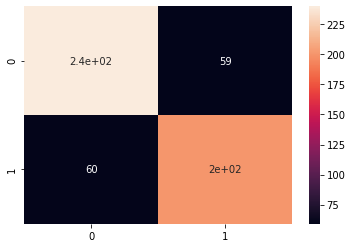

In [245]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

### Classification report ###


In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       299
           1       0.77      0.77      0.77       261

    accuracy                           0.79       560
   macro avg       0.79      0.79      0.79       560
weighted avg       0.79      0.79      0.79       560



# Coefficients & Intercept

Getting the final logistic regression equation with the values of the coefficients

In [247]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.55940333  0.15877178  1.71662913 -0.51179617  0.17119422 -0.17948885
  -0.20797058  0.70171782 -0.1569399  -0.09723228 -0.24260862 -2.92332848
  -0.12371552  0.41313906  0.5883784  -0.28834345  0.58672819 -0.19399134
  -0.28718125]]
[-0.57118321]


In [248]:
df.iloc[:, :-1].columns.values

array(['Reason A', 'Reason B', 'Reason C', 'Reason D', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Pet', 'Weight', 'Height', 'Body mass index'], dtype=object)

In [249]:
features = df.iloc[:, :-1].columns.values

In [250]:
summary = pd.DataFrame(features, columns = ['Features'])

In [251]:
summary['Coefficients'] = np.transpose(classifier.coef_)

In [252]:
summary

,Features,Coefficients
0,Reason A,1.559403
1,Reason B,0.158772
2,Reason C,1.716629
3,Reason D,-0.511796
4,Month of absence,0.171194
5,Day of the week,-0.179489
6,Seasons,-0.207971
7,Transportation expense,0.701718
8,Distance from Residence to Work,-0.156940
9,Service time,-0.097232


In [253]:
summary.index = summary.index + 1
summary.loc[0] = ['Intercept', classifier.intercept_[0]]
summary = summary.sort_index()

In [254]:
summary

,Features,Coefficients
0,Intercept,-0.571183
1,Reason A,1.559403
2,Reason B,0.158772
3,Reason C,1.716629
4,Reason D,-0.511796
5,Month of absence,0.171194
6,Day of the week,-0.179489
7,Seasons,-0.207971
8,Transportation expense,0.701718
9,Distance from Residence to Work,-0.156940


# Interpretation of Coefficients

For Logistic Regression,

log(odds) = b0 + b1x1 + b2x2 +.........

**Standard Coefficients** : the coefficients where all variables are standarsized

Whichever weight is bigger, its corresponding feature is more important

In [255]:
summary['Odds Ratio'] = np.exp(summary.Coefficients)

In [256]:
summary

,Features,Coefficients,Odds Ratio
0,Intercept,-0.571183,0.564857
1,Reason A,1.559403,4.755983
2,Reason B,0.158772,1.172070
3,Reason C,1.716629,5.565735
4,Reason D,-0.511796,0.599418
5,Month of absence,0.171194,1.186721
6,Day of the week,-0.179489,0.835697
7,Seasons,-0.207971,0.812231
8,Transportation expense,0.701718,2.017215
9,Distance from Residence to Work,-0.156940,0.854755


### By Odds Ratio

In [257]:
summary.sort_values(by=['Odds Ratio'], ascending = False, ignore_index = True)

,Features,Coefficients,Odds Ratio
0,Reason C,1.716629,5.565735
1,Reason A,1.559403,4.755983
2,Transportation expense,0.701718,2.017215
3,Social drinker,0.588378,1.801065
4,Weight,0.586728,1.798096
5,Son,0.413139,1.511555
6,Month of absence,0.171194,1.186721
7,Reason B,0.158772,1.172070
8,Service time,-0.097232,0.907345
9,Education,-0.123716,0.883631


### By Coefficients

In [258]:
summary.sort_values(by=['Coefficients'], ascending = False, ignore_index = True)

,Features,Coefficients,Odds Ratio
0,Reason C,1.716629,5.565735
1,Reason A,1.559403,4.755983
2,Transportation expense,0.701718,2.017215
3,Social drinker,0.588378,1.801065
4,Weight,0.586728,1.798096
5,Son,0.413139,1.511555
6,Month of absence,0.171194,1.186721
7,Reason B,0.158772,1.172070
8,Service time,-0.097232,0.907345
9,Education,-0.123716,0.883631


# Model Testing

### Predict Test data

In [259]:
y_pred = classifier.predict(X_test)

In [260]:
y_pred[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [261]:
y_pred.shape

(140,)

In [262]:
# find the predicted probabilities of each class
# the first column shows the probability of a particular observation to be 0, while the second one - to be 1
predicted_proba = classifier.predict_proba(X_test)

# let's check that out
predicted_proba[:10]

array([[0.71223799, 0.28776201],
       [0.86424082, 0.13575918],
       [0.82875741, 0.17124259],
       [0.56120292, 0.43879708],
       [0.47883466, 0.52116534],
       [0.06029032, 0.93970968],
       [0.71205486, 0.28794514],
       [0.27185721, 0.72814279],
       [0.90318307, 0.09681693],
       [0.67127702, 0.32872298]])

In [263]:
predicted_proba.shape

(140, 2)

# Testing Metrices

### Accuracy

In [264]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.76%


### K-fold Cross Validation ###

In [265]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.54 %
Standard Deviation: 4.00 %


### Confusion Matrix

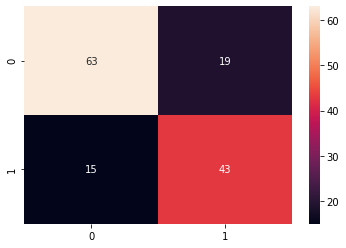

In [266]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.show()

### Classification Report

In [267]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        82
           1       0.69      0.74      0.72        58

    accuracy                           0.76       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.76      0.76       140



# Model Saving

In [268]:
import pickle

In [271]:
with open("/content/drive/My Drive/Project/Absenteeism/model", 'wb') as file:
   pickle.dump(classifier, file)

In [272]:
with open("/content/drive/My Drive/Project/Absenteeism/scaler", 'wb') as file:
   pickle.dump(scaler_X, file)